# **SHapley Additive exPlanations Model Interpretability Analysis for Top2Vec Natural Language Processing**: Part 4

## **III. Proposed Methods**: continued

## **III.C. Time Series Analysis:**

### **INSTALLATIONS**

In [1]:
!pip3 install iexfinance
!pip install config
!pip install influxdb
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 1.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 2.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 1.1 MB 47.9 MB/s 
     |████████████████████████████████| 20.9 MB 1.3 MB/s 
     |████████████████████████████████| 16.6 MB 53.6 MB/s 
     |████████████████████████████████| 7.8 MB 41.6 MB/s 


### **IMPORTED LIBRARIES**

In [2]:
import pandas as pd  # To read the csv file to a data frame.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from matplotlib.dates import DateFormatter
import seaborn as sns
import earthpy as et

import config
import os
from datetime import datetime

# **UPLOAD DATA**

In [3]:
df_Cleaned_Depression_PCS_Data = pd.read_csv ('/Cleaned_Depression_PCS_Data_DAF.csv')
df_Cleaned_Depression_PCS_Data

,Unnamed: 0,Documents_from_Depression_or_PCS_Topics,UTC_dates_from_Depression_or_PCS_Topics,Topic,Processed_comments
0,0,Being depressed feels an awful lot like being ...,1.414623e+09,depression,`` depressed feels awful lot like alone lot ti...
1,1,"That's what I did when I retrained, but someth...",1.407341e+09,pcs,"'that retained , something say may also need a..."
2,2,OP said he’s at 5 now so,1.644846e+09,depression,'op said 5 '
3,3,"First, are you even qualified as in rank, and ...",1.472822e+09,pcs,"'first , even qualified rank , per ? saw afd k..."
4,4,Wow thanks for all the info this is great. I'm...,1.586232e+09,depression,'wow thanks info great . gon na get right away...
...,...,...,...,...,...
260,260,"Please, no tie tabs!",1.632295e+09,pcs,"'please , tie tabs ! '"
261,261,Sorry for being off topic but did you want a s...,1.434379e+09,pcs,'sorry topic want statewide follow ? '
262,262,Thanks man,1.445926e+09,depression,'thanks man '
263,263,"That's mids brain for you, OP tried their best",1.636722e+09,pcs,"'that mid brain , op tried best '"


# **PROPROCESSSING TIME SERIES DATA**

**Preprocessing time data**

Convert Epoch time stamp Date Time.

In [4]:
df_Cleaned_Depression_PCS_Data["date_time"] = pd.to_datetime(df_Cleaned_Depression_PCS_Data['UTC_dates_from_Depression_or_PCS_Topics'], unit = 's')
df_date_sorted_data = df_Cleaned_Depression_PCS_Data.sort_values('UTC_dates_from_Depression_or_PCS_Topics', ascending = True)
df_date_sorted_data

,Unnamed: 0,Documents_from_Depression_or_PCS_Topics,UTC_dates_from_Depression_or_PCS_Topics,Topic,Processed_comments,date_time
245,245,"Not in DEP, Going to get my physical this thur...",1.328065e+09,depression,"'not dep , going get physical thursday taking ...",2012-02-01 02:56:24
54,54,"Same here, their IT programs seem exceptionall...",1.343204e+09,pcs,"'same , programs seem exceptionally relevant c...",2012-07-25 08:17:51
199,199,"Thank you, you have been a huge help.",1.343290e+09,pcs,"'thank , huge help . '",2012-07-26 08:09:12
256,256,Nope!,1.351298e+09,pcs,'note ! ',2012-10-27 00:35:18
212,212,Are you sure the bonus is really 90k? That see...,1.354165e+09,depression,'are sure bonus really 90k ? seems insane . ev...,2012-11-29 04:54:48
...,...,...,...,...,...,...
214,214,Code 50 - mandatory mover after 4 years\nCode ...,1.666324e+09,pcs,'code 50 mandatory mover 4 years code 49 non m...,2022-10-21 03:50:16
24,24,Look up the pay chart for E1-E4 and compare. A...,1.666999e+09,depression,"'look pay chart e1 e4 compare . also , get hou...",2022-10-28 23:24:20
258,258,We had a guy grow a small Afro in our unit. I ...,1.667300e+09,pcs,`` guy grow small afro unit . asked allowed po...,2022-11-01 10:57:39
252,252,"Indeed. Proof is either pictures, admission, ...",1.667936e+09,depression,"'indeed . proof either pictures , admission , ...",2022-11-08 19:34:36


Convert date/time format to month/year format.

In [5]:
# Adds a month/year column into the dataframe.
df_date_sorted_data["month_year"] = df_date_sorted_data['date_time'].dt.to_period('M')
df_date_sorted_data   

,Unnamed: 0,Documents_from_Depression_or_PCS_Topics,UTC_dates_from_Depression_or_PCS_Topics,Topic,Processed_comments,date_time,month_year
245,245,"Not in DEP, Going to get my physical this thur...",1.328065e+09,depression,"'not dep , going get physical thursday taking ...",2012-02-01 02:56:24,2012-02
54,54,"Same here, their IT programs seem exceptionall...",1.343204e+09,pcs,"'same , programs seem exceptionally relevant c...",2012-07-25 08:17:51,2012-07
199,199,"Thank you, you have been a huge help.",1.343290e+09,pcs,"'thank , huge help . '",2012-07-26 08:09:12,2012-07
256,256,Nope!,1.351298e+09,pcs,'note ! ',2012-10-27 00:35:18,2012-10
212,212,Are you sure the bonus is really 90k? That see...,1.354165e+09,depression,'are sure bonus really 90k ? seems insane . ev...,2012-11-29 04:54:48,2012-11
...,...,...,...,...,...,...,...
214,214,Code 50 - mandatory mover after 4 years\nCode ...,1.666324e+09,pcs,'code 50 mandatory mover 4 years code 49 non m...,2022-10-21 03:50:16,2022-10
24,24,Look up the pay chart for E1-E4 and compare. A...,1.666999e+09,depression,"'look pay chart e1 e4 compare . also , get hou...",2022-10-28 23:24:20,2022-10
258,258,We had a guy grow a small Afro in our unit. I ...,1.667300e+09,pcs,`` guy grow small afro unit . asked allowed po...,2022-11-01 10:57:39,2022-11
252,252,"Indeed. Proof is either pictures, admission, ...",1.667936e+09,depression,"'indeed . proof either pictures , admission , ...",2022-11-08 19:34:36,2022-11


**Preprocessing topic data**

In [6]:
# Convert Topic column from string to category type variable.
df_date_sorted_data['Topic'] = df_date_sorted_data['Topic'].astype('category')
df_date_sorted_data

,Unnamed: 0,Documents_from_Depression_or_PCS_Topics,UTC_dates_from_Depression_or_PCS_Topics,Topic,Processed_comments,date_time,month_year
245,245,"Not in DEP, Going to get my physical this thur...",1.328065e+09,depression,"'not dep , going get physical thursday taking ...",2012-02-01 02:56:24,2012-02
54,54,"Same here, their IT programs seem exceptionall...",1.343204e+09,pcs,"'same , programs seem exceptionally relevant c...",2012-07-25 08:17:51,2012-07
199,199,"Thank you, you have been a huge help.",1.343290e+09,pcs,"'thank , huge help . '",2012-07-26 08:09:12,2012-07
256,256,Nope!,1.351298e+09,pcs,'note ! ',2012-10-27 00:35:18,2012-10
212,212,Are you sure the bonus is really 90k? That see...,1.354165e+09,depression,'are sure bonus really 90k ? seems insane . ev...,2012-11-29 04:54:48,2012-11
...,...,...,...,...,...,...,...
214,214,Code 50 - mandatory mover after 4 years\nCode ...,1.666324e+09,pcs,'code 50 mandatory mover 4 years code 49 non m...,2022-10-21 03:50:16,2022-10
24,24,Look up the pay chart for E1-E4 and compare. A...,1.666999e+09,depression,"'look pay chart e1 e4 compare . also , get hou...",2022-10-28 23:24:20,2022-10
258,258,We had a guy grow a small Afro in our unit. I ...,1.667300e+09,pcs,`` guy grow small afro unit . asked allowed po...,2022-11-01 10:57:39,2022-11
252,252,"Indeed. Proof is either pictures, admission, ...",1.667936e+09,depression,"'indeed . proof either pictures , admission , ...",2022-11-08 19:34:36,2022-11


**Processing data for analysis**

Loop code to generate lists that will be input into a dataframe and used to count the number of each topic category between pcs and depression within the topic column.

In [7]:
# Sets the topic dataframe column as a list.
topic_column_list = df_date_sorted_data['Topic'].tolist()
print(topic_column_list) # Validates list. 
# Initializes an empty list for PCS positive comment rows.
pcs_positive_list = [] 
# Initializes an empty list for depression positive comment rows.
depression_positive_list = [] 

# For loop that iterates through each index in the topic column list.
for Topic_column_index in topic_column_list:
  # An If conditional for when a pcs comment in the topic column list is processed. 
  if Topic_column_index == 'pcs':
    # Adds a 1 numerical for when there's a pcs comment in the topic column list.
    pcs_positive_list.append(1)
  # An Else conditional for when a pcs comment in the topic column list is processed.
  else:
    # Adds a 0 numerical for when there's a pcs comment in the topic column list.
    pcs_positive_list.append(0)

# For loop that iterates through each index in the topic column list.
for Topic_column_index in topic_column_list:
  # An If conditional for when a depression comment in the topic column list is processed. 
  if Topic_column_index == 'depression':
    # Adds a 1 numerical for when there's a depression comment in the topic column list.
    depression_positive_list.append(1)
  # An Else conditional for when a depression comment in the topic column list is processed.
  else:
    # Adds a 0 numerical for when there's a depression comment in the topic column list.
    depression_positive_list.append(0)



['depression', 'pcs', 'pcs', 'pcs', 'depression', 'pcs', 'depression', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'depression', 'depression', 'pcs', 'pcs', 'depression', 'pcs', 'pcs', 'pcs', 'pcs', 'depression', 'pcs', 'pcs', 'depression', 'depression', 'pcs', 'depression', 'pcs', 'pcs', 'depression', 'pcs', 'pcs', 'pcs', 'depression', 'depression', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'depression', 'pcs', 'pcs', 'pcs', 'depression', 'pcs', 'pcs', 'pcs', 'depression', 'pcs', 'depression', 'pcs', 'pcs', 'pcs', 'pcs', 'depression', 'depression', 'depression', 'depression', 'pcs', 'depression', 'pcs', 'depression', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'pcs', 'depression', 'pcs', 'pcs', 'pcs', 'pcs', 'depression', 'depression', 'pcs', 'depression', 'pcs', 'depression', 'depression', 'pcs', 'pcs', 'pcs', 'depression', 'depression', 'depression', 'pcs', 'pcs', 'depression', 'pcs'

**Data Grouping**

In [8]:
# Adds columns and lists to dictionary that will be converted to a dataframe.
processed_month_comment_pcs_depression_data = {'Month_in_Year': df_date_sorted_data['month_year'].tolist(),
                                               'Comment_Topic': df_date_sorted_data['Topic'].tolist(), # 'Comments_per_Month_in_Year'
                                               'PCS_Comment?_(Yes=1,No=0)': pcs_positive_list, # 'PCS_Comments_per_Month_in_Year'
                                               'Depression_Comment?_(Yes=1,No=0)': depression_positive_list, # 'Depression_Comments_per_Month_in_Year'
                                               'Processed_comments': df_date_sorted_data['Processed_comments'].tolist()	
                                               }

In [9]:
# Converts dictionary to a dataframe.
df_processed_month_comment_pcs_depression_data = pd.DataFrame(processed_month_comment_pcs_depression_data)
df_processed_month_comment_pcs_depression_data

,Month_in_Year,Comment_Topic,"PCS_Comment?_(Yes=1,No=0)","Depression_Comment?_(Yes=1,No=0)",Processed_comments
0,2012-02,depression,0,1,"'not dep , going get physical thursday taking ..."
1,2012-07,pcs,1,0,"'same , programs seem exceptionally relevant c..."
2,2012-07,pcs,1,0,"'thank , huge help . '"
3,2012-10,pcs,1,0,'note ! '
4,2012-11,depression,0,1,'are sure bonus really 90k ? seems insane . ev...
...,...,...,...,...,...
260,2022-10,pcs,1,0,'code 50 mandatory mover 4 years code 49 non m...
261,2022-10,depression,0,1,"'look pay chart e1 e4 compare . also , get hou..."
262,2022-11,pcs,1,0,`` guy grow small afro unit . asked allowed po...
263,2022-11,depression,0,1,"'indeed . proof either pictures , admission , ..."


Group all comment data columns in a dataframe by month/year.




In [10]:
# Group all dataframe columns with multiple aggregations by the same Month_in_Year column. 
df_comments_pcs_depression_per_month_year_incomplete = df_processed_month_comment_pcs_depression_data.groupby('Month_in_Year').agg(Comments_per_Month_in_Year = ('Comment_Topic', 'count'),
                                                                                                                        PCS_Comments_per_Month_in_Year = ('PCS_Comment?_(Yes=1,No=0)', 'sum'),
                                                                                                                        Depression_Comments_per_Month_in_Year = ('Depression_Comment?_(Yes=1,No=0)', 'sum'),
                                                                                                                        Monthly_Comments_Combined = ('Processed_comments', 'sum')
                                                                                                                        )
df_comments_pcs_depression_per_month_year_incomplete


,Comments_per_Month_in_Year,PCS_Comments_per_Month_in_Year,Depression_Comments_per_Month_in_Year,Monthly_Comments_Combined
Month_in_Year,,,,
2012-02,1,0,1,"'not dep , going get physical thursday taking ..."
2012-07,2,2,0,"'same , programs seem exceptionally relevant c..."
2012-10,1,1,0,'note ! '
2012-11,1,0,1,'are sure bonus really 90k ? seems insane . ev...
2012-12,1,1,0,`` true 90 asia allows pick set amount afc 's ...
...,...,...,...,...
2022-07,3,2,1,'af public affairs office posted article yeste...
2022-08,3,1,2,"'ah , explains discrepancy . case little hike ..."
2022-09,1,1,0,"'typically , pentagon tends slander monies rec..."


In [11]:
# Need to transfer df_comments_pcs_depression_per_month_year to csv format.
# Dataframe has missing months due to web scraped data that didn't find relevant comments from topic model clusters for those months.
# 1. Copy and paste output from to_csv() function to Notepad app to save into a .txt format.
# 2. .txt file can be opened in the Microsoft Excel app and saved into a .csv format
# 3. Data for months with no comments in either topic category will be manually filled in with zeroes.
# 4. Data can be reimported from a csv format for Time Series and Correlation analysis.
df_comments_pcs_depression_per_month_year_incomplete.to_csv() # Incomplete data set.

'Month_in_Year,Comments_per_Month_in_Year,PCS_Comments_per_Month_in_Year,Depression_Comments_per_Month_in_Year,Monthly_Comments_Combined\n2012-02,1,0,1,"\'not dep , going get physical thursday taking dab friday . oh , see . know . remember told make list jobs would like qualify thought would go list descending order get one want . also know first contract sign dep job . reading meps said would go job counseling assumed job would chosen also . thanks , informative . \'"\n2012-07,2,2,0,"\'same , programs seem exceptionally relevant comm cyber career fields . biggest bonus certifications come part program . get degree , certifications . keeps options open adds value eventually part ways af . \'\'thank , huge help . \'"\n2012-10,1,1,0,\'note ! \'\n2012-11,1,0,1,"\'are sure bonus really 90k ? seems insane . even though get half lump sum , would still serious cash . \'"\n2012-12,1,1,0,`` true 90 asia allows pick set amount afc \'s deploy ? ``\n2013-01,1,0,1,\'when visited brother army but gr

In [13]:
df_comments_pcs_depression_per_month_year = pd.read_csv ('/df_comments_pcs_depression_per_month_year_DAF.csv', 
                                                         header=0, 
                                                         index_col=0, 
                                                         parse_dates=False, 
                                                         squeeze=True
                                                         )
df_comments_pcs_depression_per_month_year

,Comments_per_Month_in_Year,PCS_Comments_per_Month_in_Year,Depression_Comments_per_Month_in_Year,Monthly_Comments_Combined
Month_in_Year,,,,
2012-02,1,0,1,"'not dep , going get physical thursday taking ..."
2012-03,0,0,0,NaN
2012-04,0,0,0,NaN
2012-05,0,0,0,NaN
2012-06,0,0,0,NaN
...,...,...,...,...
2022-07,3,2,1,'af public affairs office posted article yeste...
2022-08,3,1,2,"'ah , explains discrepancy . case little hike ..."
2022-09,1,1,0,"'typically , pentagon tends slander monies rec..."


# **I.V. Results and Analysis**

# **CORRELATION ANALYSIS**

Pearson's Correlation Coefficient Heatmap
* Tutorial Site References:
  * [Pearson Coefficient of Correlation with Python](https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04) by Joseph Magiya
  * [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) by pandas documentation




In [16]:
# Setting lags by 8 months for both PCS and depression comments per month.
df_comments_pcs_depression_per_month_year['PCS_Comments_per_Month_in_Year_shift4'] = df_comments_pcs_depression_per_month_year['PCS_Comments_per_Month_in_Year'].shift(4)
df_comments_pcs_depression_per_month_year['PCS_Comments_per_Month_in_Year_shift8'] = df_comments_pcs_depression_per_month_year['PCS_Comments_per_Month_in_Year'].shift(8)

df_comments_pcs_depression_per_month_year

,Comments_per_Month_in_Year,PCS_Comments_per_Month_in_Year,Depression_Comments_per_Month_in_Year,Monthly_Comments_Combined,PCS_Comments_per_Month_in_Year_shift4,PCS_Comments_per_Month_in_Year_shift8
Month_in_Year,,,,,,
2012-02,1,0,1,"'not dep , going get physical thursday taking ...",NaN,NaN
2012-03,0,0,0,NaN,NaN,NaN
2012-04,0,0,0,NaN,NaN,NaN
2012-05,0,0,0,NaN,NaN,NaN
2012-06,0,0,0,NaN,0.0,NaN
...,...,...,...,...,...,...
2022-07,3,2,1,'af public affairs office posted article yeste...,0.0,3.0
2022-08,3,1,2,"'ah , explains discrepancy . case little hike ...",4.0,1.0
2022-09,1,1,0,"'typically , pentagon tends slander monies rec...",3.0,0.0


In [14]:
import seaborn as sb

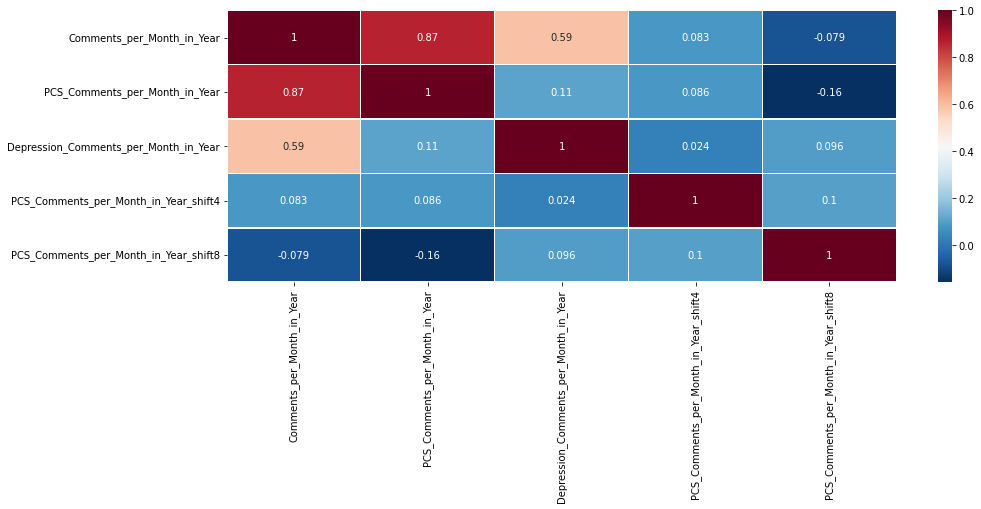

In [17]:
pearsoncorr = df_comments_pcs_depression_per_month_year.corr(method='pearson')
pearsoncorr
fig, ax = plt.subplots(figsize=(15, 5))
sb.heatmap(pearsoncorr,
           xticklabels=pearsoncorr.columns,
           yticklabels=pearsoncorr.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=0.5)

# **REGRESSION ANALYSIS**

**Linear Regression**

In [18]:
# Imported libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [19]:
df_comments_pcs_depression_per_month_year.drop(df_comments_pcs_depression_per_month_year.index[0:8], inplace=True)

In [20]:
x = df_comments_pcs_depression_per_month_year[['PCS_Comments_per_Month_in_Year','PCS_Comments_per_Month_in_Year_shift4','PCS_Comments_per_Month_in_Year_shift8']]
y = df_comments_pcs_depression_per_month_year['Depression_Comments_per_Month_in_Year']
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2, random_state=2)


In [21]:
# create linear regression object
reg = linear_model.LinearRegression()
# train the model using the training sets
linear_regression_model = reg.fit(x_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(x_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')

Coefficients:  [ 0.03525263 -0.07139604  0.06353556]
Variance score: -0.13835944577645543


In [22]:
predictions = reg.predict(x)
linear_regression_model.score(x_test, y_test)
linear_regression_model = reg.fit(x, y)
linear_regression_model.score(x, y)

0.018892674792128306

In [23]:
linear_regression_model.score(x_test, y_test)

-0.0048486063447654715